## Reading the files

In [3]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import ttest_rel
# For plotting style and resolution
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from cycler import cycler


In [12]:
line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))
# matplotlib's standard cycler
standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])
plt.rc("axes", prop_cycle=line_cycler)
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amssymb}\usepackage{mathtools}")
plt.rc("font", family="serif", size=18.)
plt.rc("savefig", dpi=500)
plt.rc("legend", loc="best", fontsize="medium", fancybox=True, framealpha=0.5)
plt.rc("lines", linewidth=2.5, markersize=8, markeredgewidth=2.5)

In [2]:
# Print the first 5 lines
filename = "../data/Beta_all_cpgs_EPIC_QuantileNormalized.txt"
with open(filename, 'r') as file:
        idx = 5
        for line in file:
            idx = idx - 1
            s = line.strip()
            print(s)  # .strip() removes any extra whitespace and newline characters
            if (idx < 0):
                  break

"Sites"	"X4033965402"	"X4033964727"	"X4033964893"	"X4033965028"	"X4033965193"	"X4033965111"	"X4033965562"	"X4033965006"	"X4033964886"	"X4033964857"	"X4033965476"	"X4033964733"	"X4033965283"	"X4033964726"	"X4033965538"	"X4033965372"	"X4033965375"	"X4033965373"	"X4033965194"	"X4033964807"	"X4033964767"	"X4033964828"	"X4033965278"	"X4033964637"	"X4033964804"	"X4033964839"	"X4033965347"	"X4033965423"	"X4033964678"	"X4033965219"	"X4033965048"	"X4033964902"	"X4033965336"	"X4033965186"	"X4033964966"	"X4033965000"	"X4033964683"	"X4033965182"	"X4033965475"	"X4033965158"	"X4033964700"	"X4033964624"	"X4033964871"	"X4033964704"	"X4033965015"	"X4033964642"	"X4033964640"	"X4033964651"	"X4033964699"	"X4033964818"	"X4033964823"	"X4033965348"	"X4033964671"	"X4033965578"	"X4033964896"	"X4033965014"	"X4033964645"	"X4033965387"	"X4033964719"	"X4033964666"	"X4033964707"	"X4033965386"	"X4033964898"	"X4033964884"	"X4033964977"	"X4033964805"	"X4033964938"	"X4033964840"	"X4033965484"	"X4033964747"	"X4033965290

CpG sites are marked cg07881041, cg23229610, and so forth The samples are given by X4033965402, X4033964727, and so forth. 
The degree of methylation is indicated in the cells for each combination of (sampleID, site)

In [3]:
def read_line_by_line(file_name):
    data = {}
    with open(file_name, 'r') as file:
        for line in file:
            s = line.strip()
            arr = s.split()
            if len(arr) > 1:
                column_name = arr[0]
                values = arr[1:]
                if column_name in data:
                    print("Duplicate col")
                    data[column_name].extend(values)
                else:
                    data[column_name] = values
            elif len(arr) == 1:
                # Handles the case where there is a column name but no data following it
                data[arr[0]] = []
    
    # Create DataFrame from the dictionary
    df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))
    return df

In [4]:
df = read_line_by_line(filename)
df

,"""Sites""","""cg07881041""","""cg23229610""","""cg03513874""","""cg05451842""","""cg14797042""","""cg09838562""","""cg25458538""","""cg09261072""","""cg02404579""",...,"""cg22005990""","""cg05384275""","""cg21496658""","""cg27017993""","""cg19551589""","""cg10218605""","""cg06899844""","""cg22494081""","""cg22623303""","""cg21064505"""
0,"""X4033965402""",0.915498965150752,0.87617589846615,0.912604526863284,0.115953545232274,0.954318328188501,0.0541909732883021,0.943943768230694,0.712611833745956,0.859575348780327,...,0.246486675607907,0.0211660044481096,0.033645422071818,0.891089239363875,0.0424794207137297,0.414216055058653,0.0824607736523225,0.951736964587792,0.969828885242608,0.972860484314805
1,"""X4033964727""",0.91490727532097,0.889321221446325,0.905538157551355,0.127751597701891,0.943288897110682,0.046287947099489,0.928079511098664,0.698339364638908,0.872387525229507,...,0.199868401306752,0.019621727154031,0.0319029909546472,0.886485014448462,0.039433198932984,0.435600357000104,0.0992961991357427,0.96094452086199,0.979119948743765,0.96949125610219
2,"""X4033964893""",0.907215384394433,0.901977575844078,0.897193304756073,0.0971812713763416,0.939867393159588,0.0693267248380849,0.929632992811199,0.68452908877951,0.834511154016144,...,0.212202424207191,0.0300096419720622,0.0288632168871359,0.901537335285505,0.0342025133443837,0.395688842459296,0.0845575973190604,0.956896162630101,0.977785617427541,0.965334044742559
3,"""X4033965028""",0.906710755534952,0.909132199733159,0.931954629272267,0.0992238646799182,0.933466423044822,0.0811572052401747,0.927342757000347,0.713423926847854,0.829575259346252,...,0.144275499002299,0.0202078610969761,0.0243598404126282,0.878899909828674,0.0639478088601974,0.54638477700882,0.106364185081043,0.938898545203457,0.966567699288555,0.986423650001697
4,"""X4033965193""",0.901751353587283,0.925119806905649,0.916890024070045,0.101208801892601,0.97285470164419,0.0483310367521543,0.919047211435953,0.73110264080543,0.827737205655926,...,0.161908619572262,0.0194475943625466,0.0314453871436215,0.890523277238668,0.0560968183894048,0.538422345184596,0.0902273930651555,0.942993538335547,0.971178184757408,0.967483670942312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"""X4033963319""",0.89478417266187,0.893894532258309,0.915421751652405,0.0984704732332816,0.944053765355172,0.0471134112608191,0.923310569105691,0.687794337824963,0.837861516446504,...,0.228716366367133,0.023984644665957,0.0528622059929116,0.883416087388282,0.00104806544586451,0.44745669615709,0.0841719069040976,0.954162265579847,0.973953303570936,0.985908689641388
92,"""X4033963470""",0.908012648786074,0.890609461571246,0.922067754290188,0.0965320040368207,0.952695895411822,0.0668455221282435,0.921016410044288,0.700539397717724,0.869174463134422,...,0.237384896763894,0.0253174975513799,0.0651921685155332,0.896153665303052,0.0509790949986769,0.460084370772864,0.0887353706111834,0.955886155253684,0.980833402605422,0.973318501321984
93,"""X4033963187""",0.920080630817573,0.900941958297769,0.92596050833964,0.114469483715737,0.923798466543285,0.0749981341095438,0.923445414262668,0.691199053361431,0.830739978689789,...,0.188518459626744,0.0204957454679985,0.030569303262899,0.90267743840384,0.0496815203316897,0.54985070934149,0.104780429628157,0.951692059771462,0.973529063305708,0.981080529030281
94,"""X4033963311""",0.899854085092535,0.890418164285088,0.917419104824646,0.0700625214472836,0.93895560621372,0.0624757302498166,0.915047682150548,0.697162595608191,0.849340147243108,...,0.200786283221034,0.0291068179178443,0.032895654735145,0.900178983754833,0.102762687976355,0.523052814188605,0.0803508484301992,0.954559384037846,0.974884092557743,0.967592999736171


In [5]:
df.shape

(96, 866239)

In [135]:
# Read the file with the fasting data
filename_aging = "../data/Buchinger_results_all.xlsx"
df_aging = pd.read_excel(filename_aging)

In [136]:
df_aging

,ID.Patient,ID_Primary_sample,Samples,Nb.sites,Timepoint,Sex.prediction,Ethnicity.prediction,Sex,Score.horvath,Score GKM age,Value.Smoking.position.population,Value.Equivalent.cigarettes,Value.Diet.position.population,Value.Equivalent.fruits.vegis,Value.Alcohol.position.population,Value.Equivalent.alcohol.units,Value.Activity.position.population,Value.Equivalent.minutes.of.activity
0,B__001,VB_0000000592,4033965402,866238,1,Correct,WHITE,Male,43.3,52.640,24,0,41,4.0,53,4,77,540
1,B__001,VB_0000000593,4033964727,866238,2,Correct,WHITE,Male,44.0,53.450,14,0,42,4.0,43,2,39,120
2,B__001,VB_0000000594,4033964893,866238,3,Correct,WHITE,Male,46.5,51.700,21,0,41,4.0,35,1,74,540
3,B__002,VB_0000000618,4033965028,866238,1,Correct,WHITE,Male,54.3,56.900,24,0,50,4.0,34,1,3,60
4,B__002,VB_0000000619,4033965193,866238,2,Correct,WHITE,Male,55.4,64.100,20,0,10,2.0,58,6,25,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,B__032,VB_0000000741,4033963319,866238,2,Correct,WHITE,Male,41.2,46.470,7,0,35,3.5,29,0,30,90
92,B__032,VB_0000000742,4033963470,866238,3,Correct,WHITE,Male,42.4,44.099,10,0,41,4.0,36,1,25,90
93,B__033,VB_0000000743,4033963187,866238,1,Correct,WHITE,Male,27.1,35.300,0,0,41,4.0,35,1,24,90
94,B__033,VB_0000000744,4033963311,866238,2,Correct,WHITE,Male,33.9,33.400,9,0,50,4.0,42,2,26,90


In [8]:
df_aging['Samples'] = df_aging['Samples'].apply(lambda x: 'X' + str(x)) # To ensure they are the same as the Sites column in 
df.rename(columns={col: col.replace('"', '').replace("'", "") for col in df.columns}, inplace=True)
df.rename(columns={'Sites': 'Samples'}, inplace=True)

In [21]:
df = df.replace('"', '', regex=True)

In [23]:
df.to_csv("methylation.csv", index=False)

In [24]:
merged_df = pd.merge(df, df_aging, on='Samples', how='inner')

In [25]:
merged_df.to_csv("merged.csv", index=False)

In [4]:
merged_df = pd.read_csv("merged.csv")

In [4]:
[el for el in merged_df.columns.values if "age" in el]

['Score GKM age']

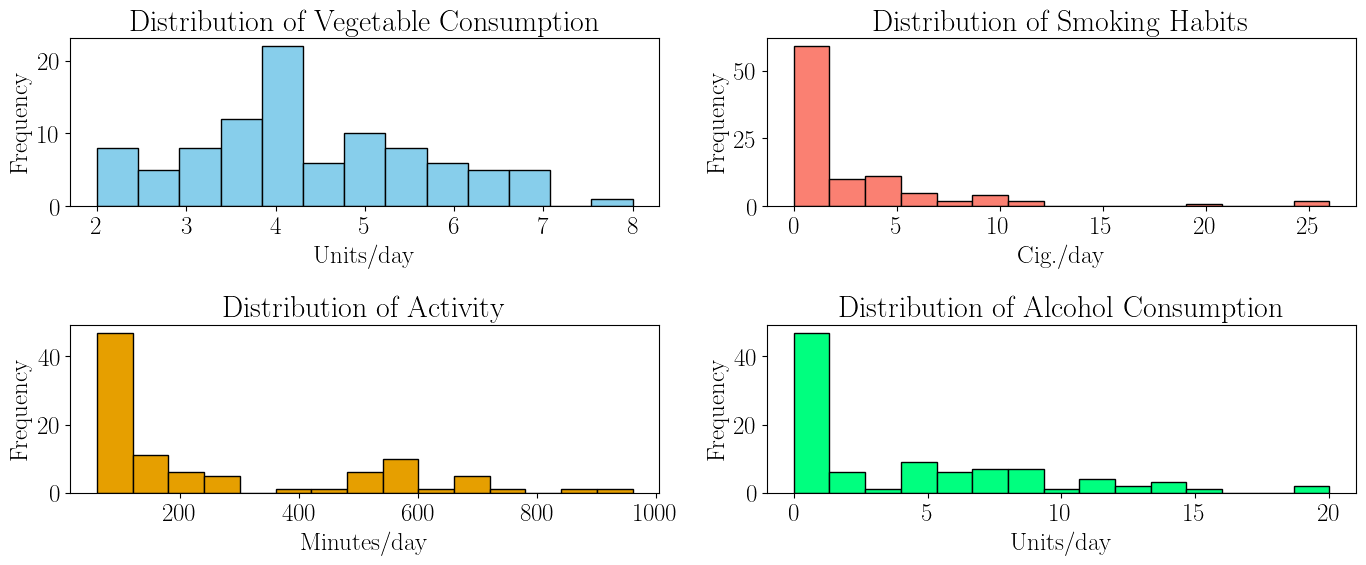

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Plotting the distribution of Age
axes[0][0].hist(merged_df['Value.Equivalent.fruits.vegis'], bins=13, color='skyblue', edgecolor='black')
axes[0][0].set_title('Distribution of Vegetable Consumption')
axes[0][0].set_xlabel('Units/day')
axes[0][0].set_ylabel('Frequency')

# Plotting the distribution of Sex
#sex_counts = merged_df['Value.Equivalent.cigarettes'].value_counts()
axes[0][1].hist(merged_df['Value.Equivalent.cigarettes'], bins=15, color='salmon', edgecolor='black')
axes[0][1].set_title('Distribution of Smoking Habits')
axes[0][1].set_xlabel('Cig./day')
axes[0][1].set_ylabel('Frequency')

axes[1][0].hist(merged_df['Value.Equivalent.minutes.of.activity'], bins=15, edgecolor='black')
axes[1][0].set_title('Distribution of Activity')
axes[1][0].set_xlabel('Minutes/day')
axes[1][0].set_ylabel('Frequency')

axes[1][1].hist(merged_df['Value.Equivalent.alcohol.units'], bins=15, color="springgreen", edgecolor='black')
axes[1][1].set_title('Distribution of Alcohol Consumption')
axes[1][1].set_xlabel('Units/day')
axes[1][1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig("patient_distributions.png")
plt.show()

In [56]:
len(merged_df[merged_df['Timepoint'] == 3]['Value.Equivalent.cigarettes'])

32

In [171]:
def evolution_plot(title, criteria, y_label, color = 'red'):
    y_1 = merged_df[merged_df['Timepoint'] == 1][criteria]
    y_2 = merged_df[merged_df['Timepoint'] == 2][criteria]
    y_3 = merged_df[merged_df['Timepoint'] == 3][criteria]

    mean_y_1 = np.mean(y_1)
    mean_y_2 = np.mean(y_2)
    mean_y_3 = np.mean(y_3)

    # X values corresponding to each category
    x_values = ['1', '2', '3']
    mean_y_values = [mean_y_1, mean_y_2, mean_y_3]

    # Create scatter plot
    plt.figure(figsize=(7, 4))
    categories_full = ['1'] * 32 + ['2'] * 32 + ['3'] * 32 
    y_values_full = np.concatenate([y_1, y_2, y_3])
    plt.scatter(categories_full, y_values_full, color = color, alpha=1)

    # Plot dotted line connecting the means of each category
    plt.plot(x_values, mean_y_values, linestyle='--', color='black', marker='o')

    # Labeling the axes
    plt.xlabel('Time-point')
    plt.ylabel(y_label)

    # Title of the plot
    plt.title(f'Change in {title}') 

    # Show plot
    plt.tight_layout()
    plt.savefig(f"{title}_evolution.png")
    plt.show()

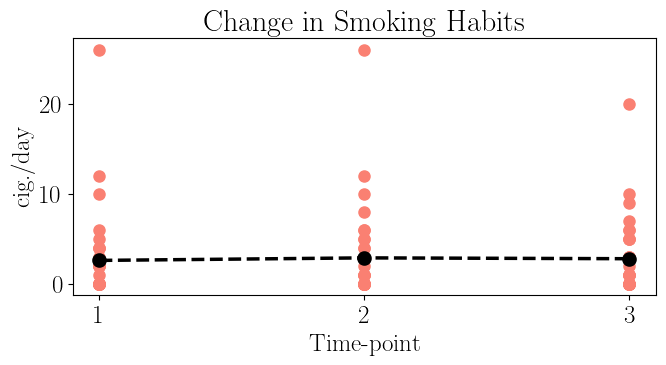

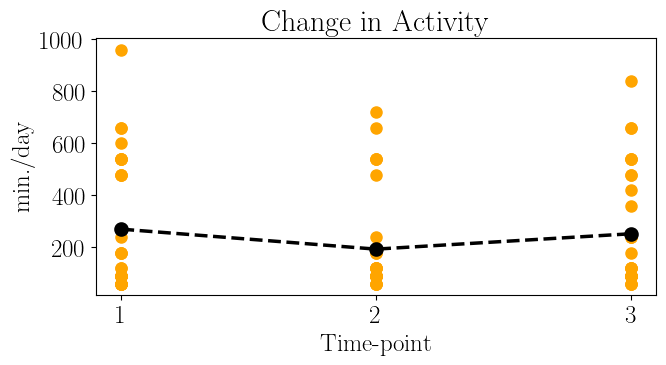

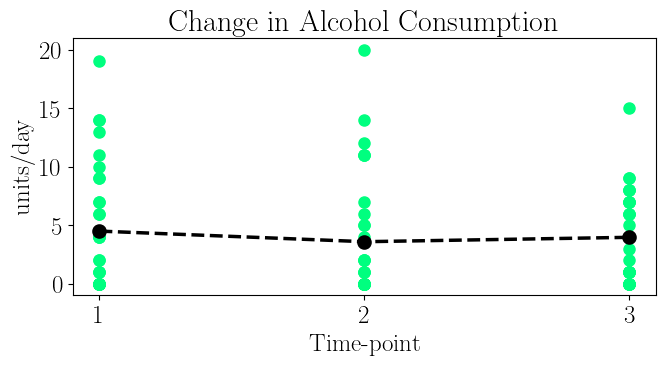

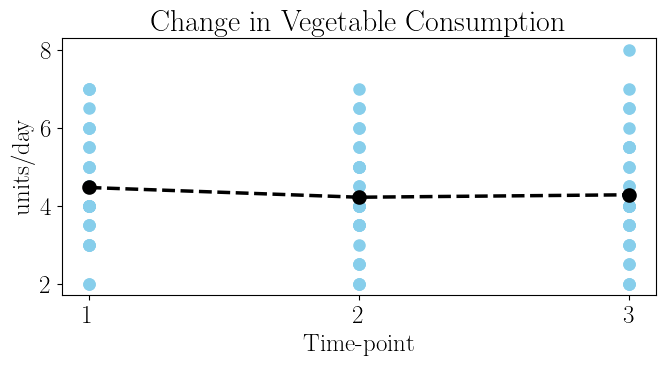

In [174]:
evolution_plot("Smoking Habits", 'Value.Equivalent.cigarettes', 'cig./day', color = 'salmon')
evolution_plot("Activity", 'Value.Equivalent.minutes.of.activity', 'min./day', color = 'orange')
evolution_plot("Alcohol Consumption", 'Value.Equivalent.alcohol.units', 'units/day', color = 'springgreen')
evolution_plot("Vegetable Consumption", 'Value.Equivalent.fruits.vegis', 'units/day', color = 'skyblue')

In [24]:
merged_df

,Samples,cg07881041,cg23229610,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,...,Score GKM age,Value.Smoking.position.population,Value.Equivalent.cigarettes,Value.Diet.position.population,Value.Equivalent.fruits.vegis,Value.Alcohol.position.population,Value.Equivalent.alcohol.units,Value.Activity.position.population,Value.Equivalent.minutes.of.activity,DunedIn
0,X4033965402,0.915499,0.876176,0.912605,0.115954,0.954318,0.054191,0.943944,0.712612,0.859575,...,52.640,24,0,41,4.0,53,4,77,540,2.708819
1,X4033964727,0.914907,0.889321,0.905538,0.127752,0.943289,0.046288,0.928080,0.698339,0.872388,...,53.450,14,0,42,4.0,43,2,39,120,2.706307
2,X4033964893,0.907215,0.901978,0.897193,0.097181,0.939867,0.069327,0.929633,0.684529,0.834511,...,51.700,21,0,41,4.0,35,1,74,540,2.673823
3,X4033965028,0.906711,0.909132,0.931955,0.099224,0.933466,0.081157,0.927343,0.713424,0.829575,...,56.900,24,0,50,4.0,34,1,3,60,2.692185
4,X4033965193,0.901751,0.925120,0.916890,0.101209,0.972855,0.048331,0.919047,0.731103,0.827737,...,64.100,20,0,10,2.0,58,6,25,90,2.561859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,X4033963319,0.894784,0.893895,0.915422,0.098470,0.944054,0.047113,0.923311,0.687794,0.837862,...,46.470,7,0,35,3.5,29,0,30,90,2.560155
92,X4033963470,0.908013,0.890609,0.922068,0.096532,0.952696,0.066846,0.921016,0.700539,0.869174,...,44.099,10,0,41,4.0,36,1,25,90,2.653944
93,X4033963187,0.920081,0.900942,0.925961,0.114469,0.923798,0.074998,0.923445,0.691199,0.830740,...,35.300,0,0,41,4.0,35,1,24,90,2.585947
94,X4033963311,0.899854,0.890418,0.917419,0.070063,0.938956,0.062476,0.915048,0.697163,0.849340,...,33.400,9,0,50,4.0,42,2,26,90,2.546456


## Extracting relevant biomarkers

In [6]:
# Only columns starting with 'cg' since these are the methylation data and the columns for color coding which are horvath age and fasting stage
cg_columns = [col for col in merged_df.columns if col.startswith('cg')]
ch_columns = [col for col in merged_df.columns if col.startswith('ch')]
relevant_columns = cg_columns + ch_columns + ['Timepoint', 'Score.horvath', 'Score GKM age']
data = merged_df[relevant_columns]

# Handle missing values if necessary
data.dropna(subset=cg_columns, inplace=True)  # assuming you want to drop rows with missing methylation data

C:\Users\amroa\AppData\Local\Temp\ipykernel_20756\3252201266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=cg_columns, inplace=True)  # assuming you want to drop rows with missing methylation data


In [7]:
data[['cg07881041']], data[['ch.4.37949012R']] 

(    cg07881041
 0     0.915499
 1     0.914907
 2     0.907215
 3     0.906711
 4     0.901751
 ..         ...
 91    0.894784
 92    0.908013
 93    0.920081
 94    0.899854
 95    0.895405
 
 [96 rows x 1 columns],
     ch.4.37949012R
 0         0.058647
 1         0.037005
 2         0.047220
 3         0.025824
 4         0.041793
 ..             ...
 91        0.034688
 92        0.043463
 93        0.051578
 94        0.039785
 95        0.025034
 
 [96 rows x 1 columns])

In [8]:
data.shape, merged_df.shape

((96, 866241), (96, 866256))

In [72]:
def compute_bioage_correlations(colnames):
    cg_gkm_corrs = {}
    cg_gkm_pvalues = {}
    cg_hor_corrs = {}
    cg_hor_pvalues = {}
    for column in colnames:
        # for GKM
        corr, p_val = scipy.stats.spearmanr(data[column], data['Score GKM age'])
        cg_gkm_corrs[column] = corr
        cg_gkm_pvalues[column] = p_val
        
        # for horvath
        corr, p_val = scipy.stats.spearmanr(data[column], data['Score.horvath'])
        cg_hor_corrs[column] = corr
        cg_hor_pvalues[column] = p_val

    return cg_gkm_corrs, cg_gkm_pvalues, cg_hor_corrs, cg_hor_pvalues

In [73]:
cg_columns = [col for col in data.columns if col.startswith('cg')]
ch_columns = [col for col in data.columns if col.startswith('ch')] # non-cgi

cg_gkm_corrs, cg_gkm_pvalues, cg_hor_corrs, cg_hor_pvalues = compute_bioage_correlations(cg_columns)
ch_gkm_corrs, ch_gkm_pvalues, ch_hor_corrs, ch_hor_pvalues = compute_bioage_correlations(ch_columns)

In [74]:
import json
with open('cg_gkm_corrs.json', 'w') as json_file:
    json.dump(cg_gkm_corrs, json_file, indent=4) 
with open('ch_gkm_corrs.json', 'w') as json_file:
    json.dump(ch_gkm_corrs, json_file, indent=4) 
with open('cg_hor_corrs.json', 'w') as json_file:
    json.dump(cg_hor_corrs, json_file, indent=4)  
with open('ch_hor_corrs.json', 'w') as json_file:
    json.dump(ch_hor_corrs, json_file, indent=4)  # 'indent' for pretty printing

In [75]:
def corr_distribution_plot(correlations, title):
    correlations = np.array(list(correlations.values()))
    mean = np.mean(correlations)
    std = np.std(correlations)
    print(f"{title}: {mean}")
    print(f"{title}: {std}")

    # Generate the kernel density estimate
    kde = sns.kdeplot(correlations, bw_adjust=0.5).get_lines()[0].get_data()
    kde_x = kde[0]
    kde_y = kde[1]

    # Plot the KDE curve
    #plt.figure(figsize=(50, 50))
    plt.plot(kde_x, kde_y, linestyle="solid", color='blue')

    # Add a vertical line for the mean
    plt.vlines(mean, 0, max(kde_y), colors='red', linestyle='dashed', linewidth=2, label='Mean')

    # Fill the area under the KDE curve within one standard deviation
    plt.fill_between(kde_x, kde_y, where=(mean - std <= kde_x) & (kde_x <= mean + std), color='grey', alpha=0.5, label='1 std. dev.')
    plt.fill_between(kde_x, kde_y, where=(mean - std+0.006 >= kde_x) | (kde_x >= -0.01+mean + std), color='blue', alpha=0.3) # to beautify plot, some errors were deliberately added


    # Add titles and labels
    plt.title('Distribution of CpG Correlations')
    plt.xlabel('Correlation Value')
    plt.ylabel('Density')
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.savefig(f"./plots/{title}.jpg")
    plt.show()

non_cgi_corr_hor: -0.012755970858787895
non_cgi_corr_hor: 0.1136545955221794


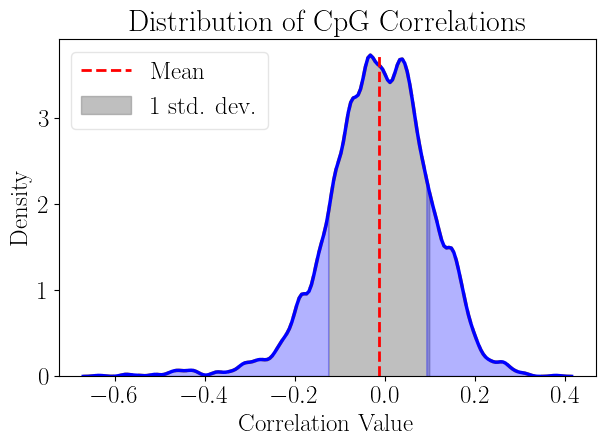

cgi_corr_hor: -0.004280727283126912
cgi_corr_hor: 0.15826696851237987


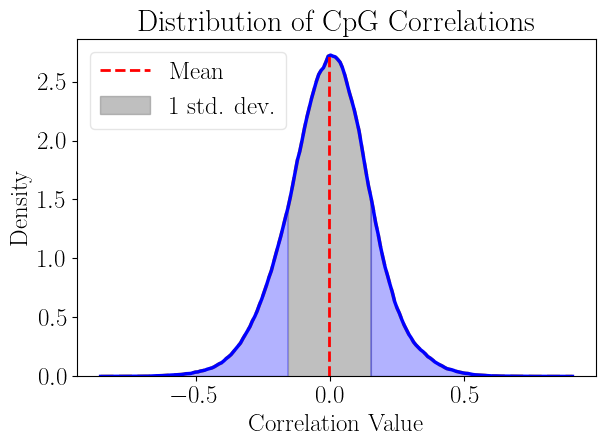

non_cgi_corr_gkm: 0.027528798028509636
non_cgi_corr_gkm: 0.11664849114178256


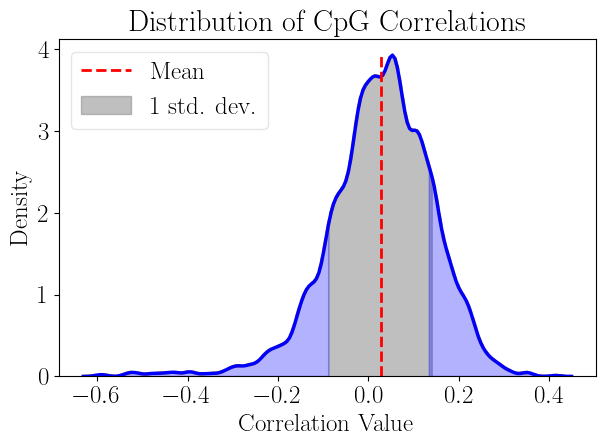

cgi_corr_gkm: -0.006245738018020419
cgi_corr_gkm: 0.16231496072661805


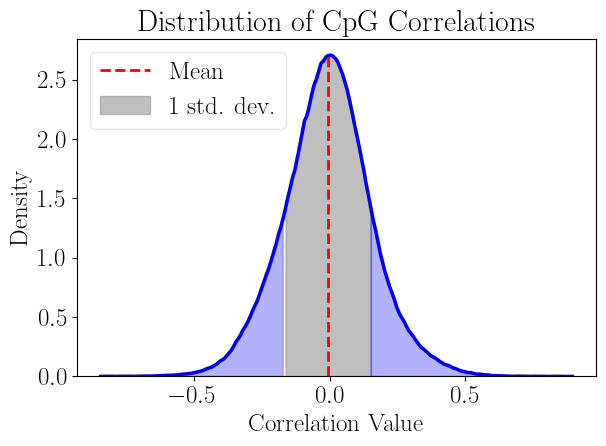

In [76]:
corr_distribution_plot(ch_hor_corrs, "non_cgi_corr_hor")
corr_distribution_plot(cg_hor_corrs, "cgi_corr_hor")
corr_distribution_plot(ch_gkm_corrs, "non_cgi_corr_gkm")
corr_distribution_plot(cg_gkm_corrs, "cgi_corr_gkm")

In [87]:
# data.iloc[:, np.where(np.abs(correlations) > 0.5)[0]].to_csv("pruned_data.csv", index=False)
# data.iloc[:, np.where(np.abs(correlations) > 0.5)[0]]

,cg07881041,cg23229610,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,cg04118974,...,cg22005990,cg05384275,cg21496658,cg27017993,cg19551589,cg10218605,cg06899844,cg22494081,cg22623303,cg21064505
0,0.915499,0.876176,0.912605,0.115954,0.954318,0.054191,0.943944,0.712612,0.859575,0.674862,...,0.246487,0.021166,0.033645,0.891089,0.042479,0.414216,0.082461,0.951737,0.969829,0.972860
1,0.914907,0.889321,0.905538,0.127752,0.943289,0.046288,0.928080,0.698339,0.872388,0.654277,...,0.199868,0.019622,0.031903,0.886485,0.039433,0.435600,0.099296,0.960945,0.979120,0.969491
2,0.907215,0.901978,0.897193,0.097181,0.939867,0.069327,0.929633,0.684529,0.834511,0.668713,...,0.212202,0.030010,0.028863,0.901537,0.034203,0.395689,0.084558,0.956896,0.977786,0.965334
3,0.906711,0.909132,0.931955,0.099224,0.933466,0.081157,0.927343,0.713424,0.829575,0.635120,...,0.144275,0.020208,0.024360,0.878900,0.063948,0.546385,0.106364,0.938899,0.966568,0.986424
4,0.901751,0.925120,0.916890,0.101209,0.972855,0.048331,0.919047,0.731103,0.827737,0.654966,...,0.161909,0.019448,0.031445,0.890523,0.056097,0.538422,0.090227,0.942994,0.971178,0.967484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.894784,0.893895,0.915422,0.098470,0.944054,0.047113,0.923311,0.687794,0.837862,0.628734,...,0.228716,0.023985,0.052862,0.883416,0.001048,0.447457,0.084172,0.954162,0.973953,0.985909
92,0.908013,0.890609,0.922068,0.096532,0.952696,0.066846,0.921016,0.700539,0.869174,0.660432,...,0.237385,0.025317,0.065192,0.896154,0.050979,0.460084,0.088735,0.955886,0.980833,0.973319
93,0.920081,0.900942,0.925961,0.114469,0.923798,0.074998,0.923445,0.691199,0.830740,0.601039,...,0.188518,0.020496,0.030569,0.902677,0.049682,0.549851,0.104780,0.951692,0.973529,0.981081
94,0.899854,0.890418,0.917419,0.070063,0.938956,0.062476,0.915048,0.697163,0.849340,0.644597,...,0.200786,0.029107,0.032896,0.900179,0.102763,0.523053,0.080351,0.954559,0.974884,0.967593


## Which sites are most age-correlated with p=0.001 significance

In [111]:
def plot_top_correlations( ch_gkm_corrs, cg_gkm_pvalues, type, age, limit = 30, significance = 0.001):
    filtered_sites = {site: ch_gkm_corrs[site] for site in ch_gkm_corrs if cg_gkm_pvalues[site] <= significance}
    sorted_sites = sorted(filtered_sites.items(), key=lambda item: abs(item[1]), reverse=True)
    top_30_sites = sorted_sites[:limit]
    sites, corrs = zip(*top_30_sites)
    plt.figure(figsize=(12, 8))
    plt.barh(sites, corrs, color='skyblue')
    plt.xlabel('Correlation')
    plt.ylabel('Gene Sites')
    plt.title(rf'{type} Sites by Absolute Correlation (p-value $\leq$ 0.001)')
    plt.gca().invert_yaxis()  # Highest correlations on top
    plt.tight_layout()
    plt.savefig(f"{type}_{age}_top_{str(limit)}.jpg")
    plt.show()
    return sites

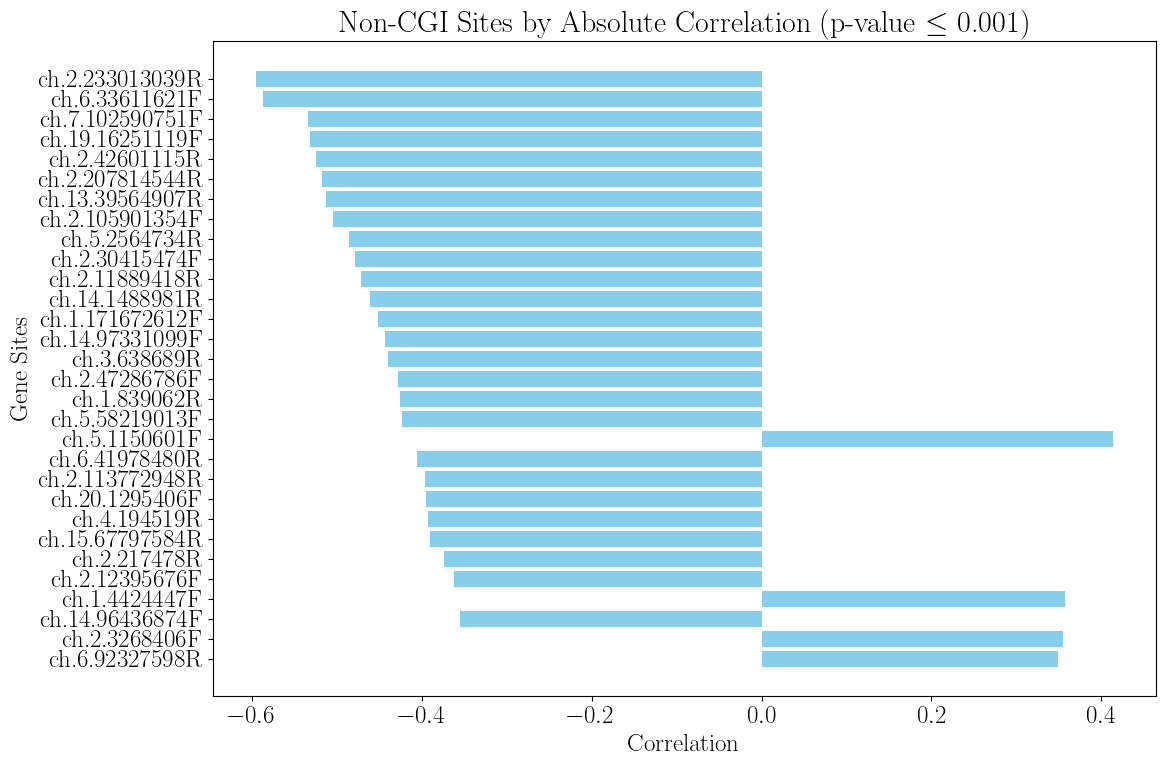

In [112]:
ch_sites_gkm = plot_top_correlations(ch_gkm_corrs, ch_gkm_pvalues, "Non-CGI", "GKM")

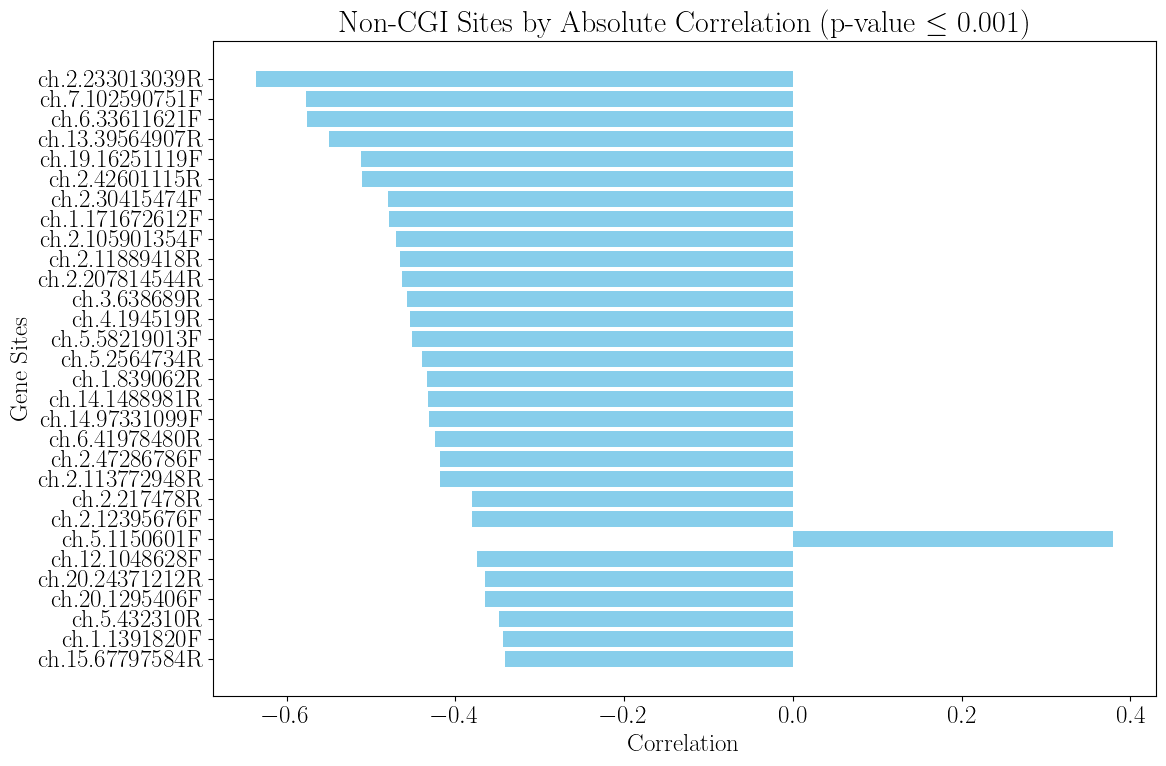

In [114]:
ch_sites_hor = plot_top_correlations(ch_hor_corrs, ch_hor_pvalues, "Non-CGI", "Horvath") # HORVATH

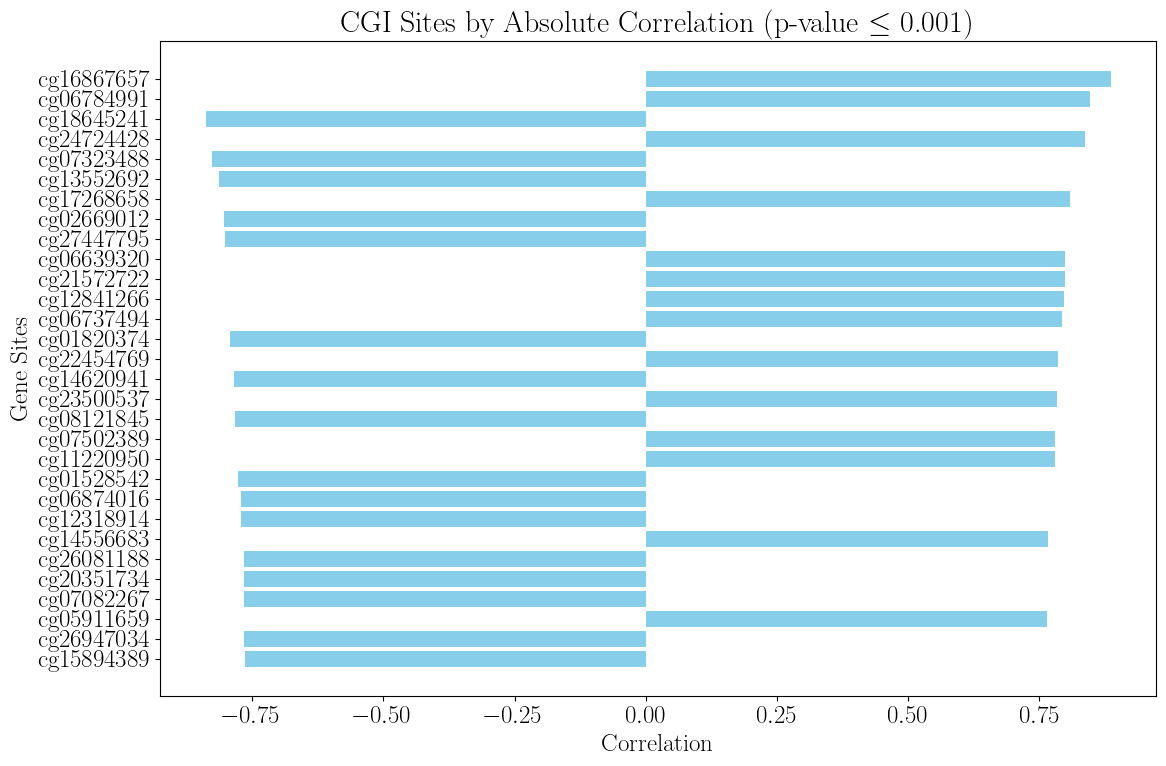

In [115]:
cg_sites_hor = plot_top_correlations(cg_hor_corrs, cg_hor_pvalues, "CGI", "Horvath") # HORVATH

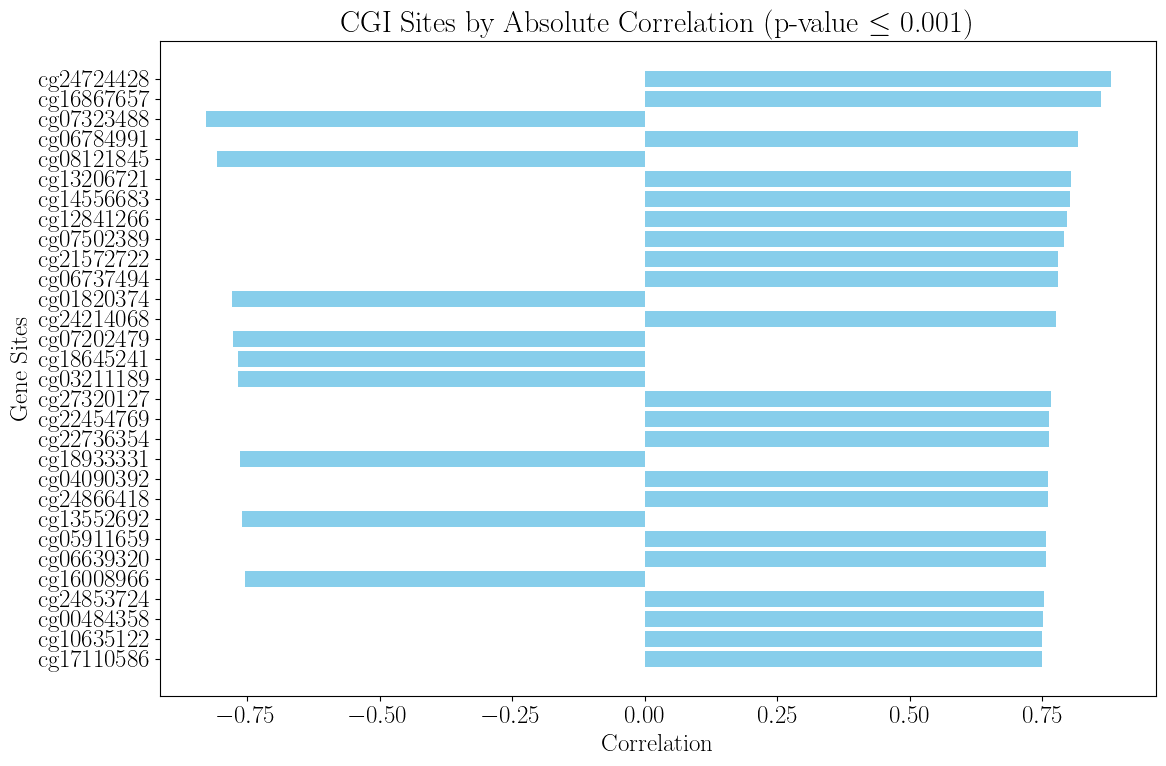

In [116]:
cg_sites_gkm = plot_top_correlations(cg_gkm_corrs, cg_gkm_pvalues, "CGI", "GKM") # GKM

## Two-dimensional PCA by Methylation Sites 

In [117]:
data.columns.values

array(['cg07881041', 'cg23229610', 'cg03513874', ..., 'Timepoint',
       'Score.horvath', 'Score GKM age'], dtype=object)

In [158]:
def plot_pca_by_sites(sites, df, type, age):
    # Handle the age column
    data_sites = df[list(sites)]
    if age == "hor":
        age_data = df['Score.horvath']
    else:
        age_data = df['Score GKM age']
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_sites)
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    pca_df['Age'] = age_data
    
    # Plot PCA results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Age'], cmap="cividis")
    plt.colorbar(scatter, label='Age')
    plt.xlabel('PCA - 1')
    plt.ylabel('PCA - 2')
    plt.title(f'PCA by {type} Sites')
    plt.tight_layout()
    plt.savefig(f"pca_{age}_{type}.jpg")
    plt.show()

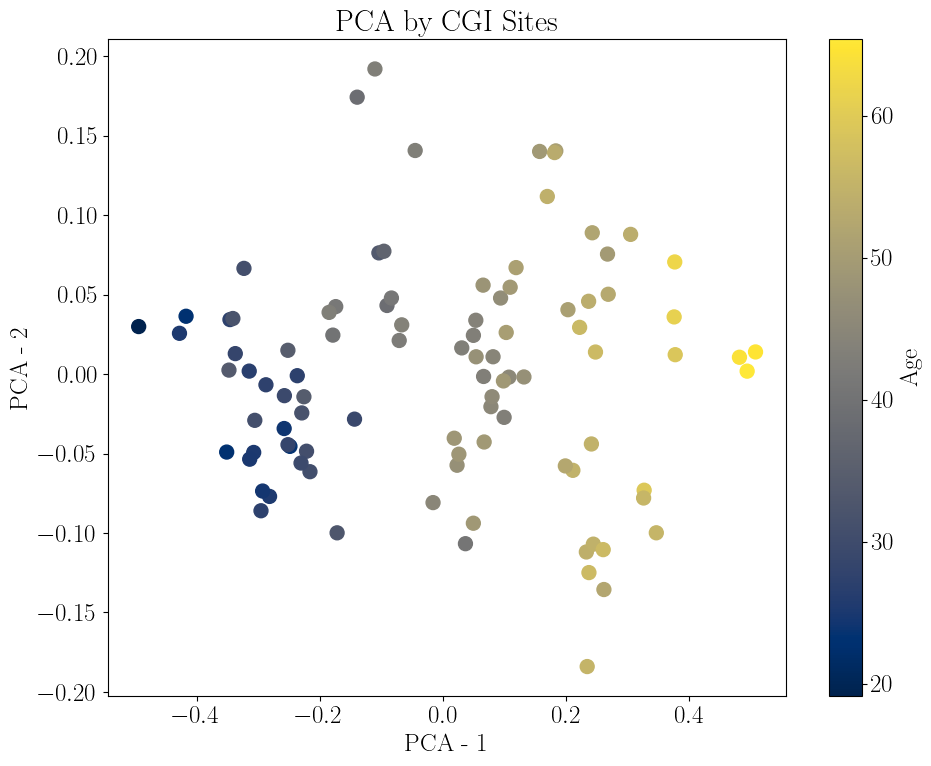

In [163]:
plot_pca_by_sites(cg_sites_hor, data, "CGI", "hor") #HORVATH

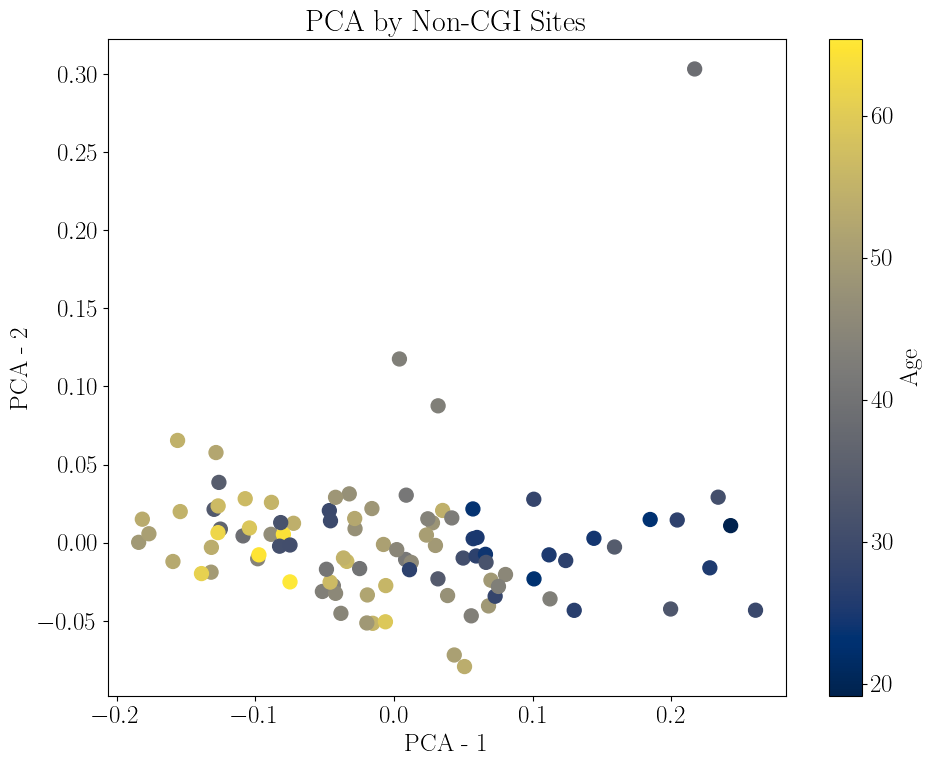

In [164]:
plot_pca_by_sites(ch_sites_hor, data, "Non-CGI", "hor") #HORVATH

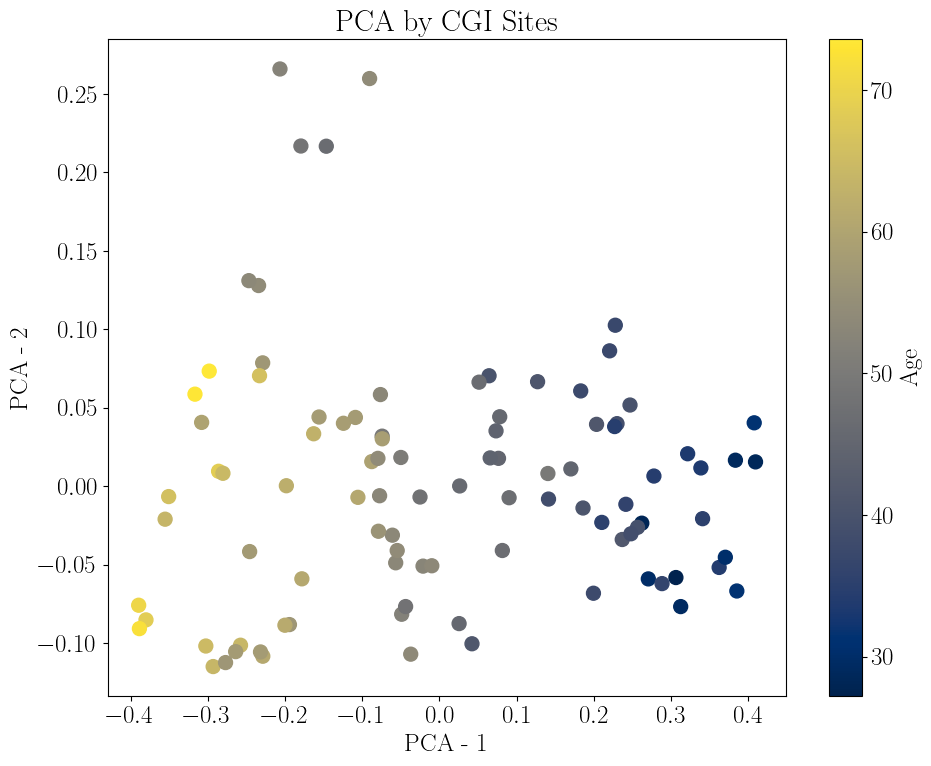

In [165]:
plot_pca_by_sites(cg_sites_gkm, data, "CGI", "GKM") #GKM

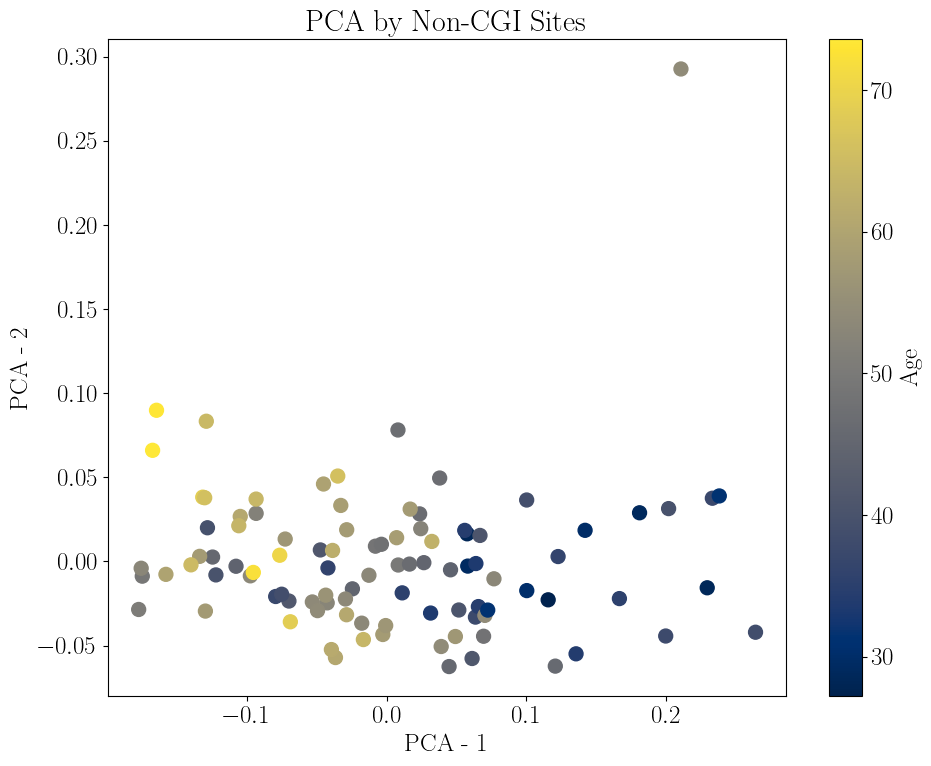

In [166]:
plot_pca_by_sites(ch_sites_gkm, data, "Non-CGI", "GKM") #GKM

#### Conclusion: differences between methylation-based clustering do not depend significantly on which biological clock is used. However, for CGI sites, Horvath provides marginally better disentanglement. For the case of non-CGI, most often it is decrease in methylation associated with aging, whereas for CGI, change in methylation (positive or negative change) associated with aging.

## Fasting and Aging 

In [88]:
bio_age_stage_hor = [merged_df[merged_df['Timepoint'] == i]['Score.horvath'] for i in range(1, 4)]
bio_age_stage_gkm = [merged_df[merged_df['Timepoint'] == i]['Score GKM age'] for i in range(1, 4)]

In [10]:
def plot_box_whiskers_age_annotated(bio_age_stage, title, xlabel, color="lightgray", alpha=1):
    def plot_box_whisker_age(ax, bio_age_stage, title, xlabel, stage=None, color="lightgray", alpha=1):
        # Plot the boxplot
        box = ax.boxplot(bio_age_stage, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        ax.scatter([1] * len(bio_age_stage), bio_age_stage, zorder=2, color=color, alpha=alpha)
        ax.set_xticks([])
        ax.set_title(title)
        ax.set_xlabel(xlabel + " " + str(stage))
        ax.set_ylabel('Biological Age (years/year)')

        # Calculate and annotate median, Q1, and Q3
        median = np.median(bio_age_stage)
        q1 = np.percentile(bio_age_stage, 25)
        q3 = np.percentile(bio_age_stage, 75)

        ax.text(0.55, median, f'Median: {median:.2f}', verticalalignment='center')
        ax.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='center')
        ax.text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='center')

    if isinstance(bio_age_stage, list):
        fig, axs = plt.subplots(1, len(bio_age_stage), figsize=(5 * len(bio_age_stage), 4))
        if len(bio_age_stage) == 1:
            axs = [axs]  # Ensure axs is a list even for a single subplot
        for idx, el in enumerate(bio_age_stage):
            plot_box_whisker_age(axs[idx], el, "", xlabel, stage=idx + 1, color=color, alpha=alpha)
        fig.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig(f"./plots/{title}_multi.jpg")
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(5, 4))
        plot_box_whisker_age(ax, bio_age_stage, title, xlabel, color=color, alpha=alpha)
        plt.savefig(f"./plots/{title}.jpg")
        plt.show()

In [94]:
# change point size
plt.rc("lines", linewidth=2.5, markersize=4, markeredgewidth=2.5)
def plot_box_whiskers_age(bio_age_stage, title, xlabel, color = "lightgray", alpha = 1):
    def plot_box_whisker_age(ax, bio_age_stage, title, xlabel, stage=None, color="lightgray", alpha = 1):
        ax.boxplot(bio_age_stage)
        ax.scatter([1] * len(bio_age_stage), bio_age_stage, zorder=2, color = color, alpha = alpha)
        ax.set_xticks([])
        ax.set_title(title)
        ax.set_xlabel(xlabel + " " + str(stage))
        ax.set_ylabel('Biological Age')

    if isinstance(bio_age_stage, list):
        fig, axs = plt.subplots(1, len(bio_age_stage), figsize=(5 * len(bio_age_stage), 4))
        if len(bio_age_stage) == 1:
            axs = [axs]  # Ensure axs is a list even for a single subplot
        for idx, el in enumerate(bio_age_stage):
            plot_box_whisker_age(axs[idx], el, "", xlabel, stage=idx + 1, color=color, alpha=alpha)
        fig.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig(f"./plots/{title}_multi.jpg")
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(5, 4))
        plot_box_whisker_age(ax, bio_age_stage, title, xlabel, color=color, alpha=alpha)
        plt.savefig(f"./plots/{title}.jpg")
        plt.show()

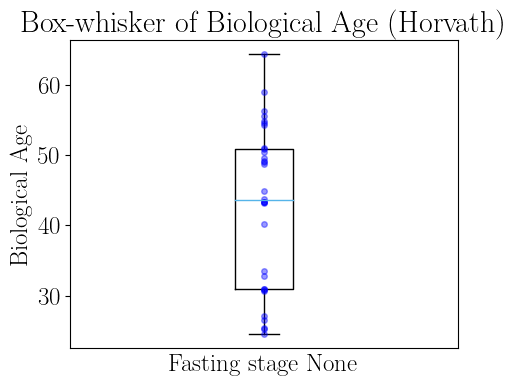

In [98]:
# This method can be called on one or multiple bio age arrays
plot_box_whiskers_age(bio_age_stage_hor[0], "Box-whisker of Biological Age (Horvath)", xlabel="Fasting stage", color = "blue", alpha=0.4)

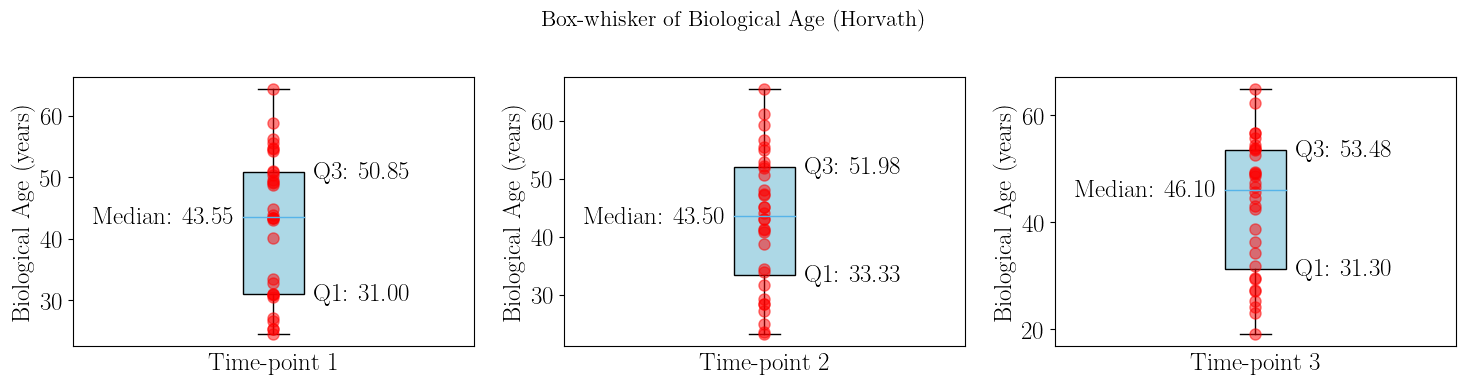

In [175]:
# Or with multiple arrays of biological age (one for each fasting age) like this
plot_box_whiskers_age_annotated(bio_age_stage_hor, "Box-whisker of Biological Age (Horvath)", xlabel="Time-point", color = "red", alpha=0.5)

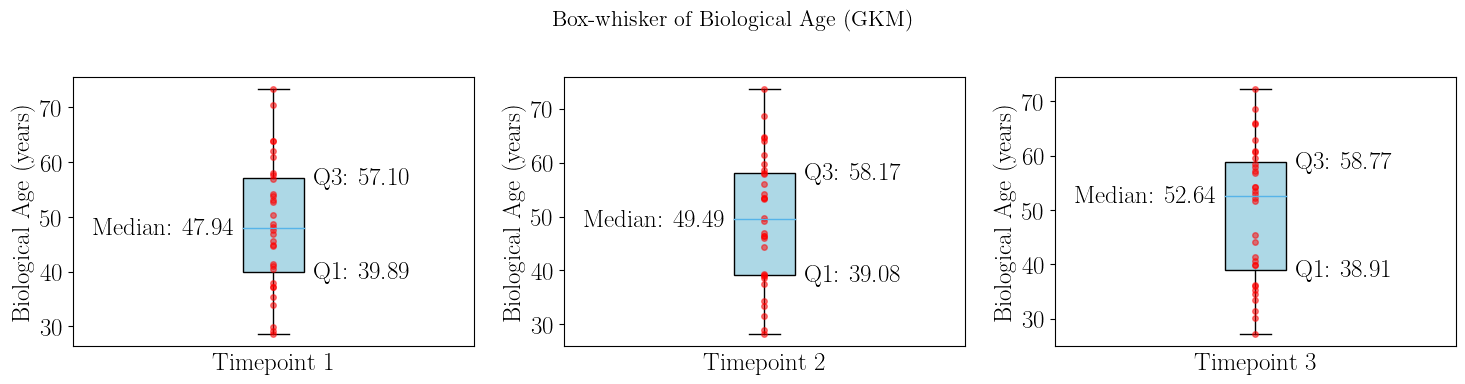

In [161]:
plot_box_whiskers_age_annotated(bio_age_stage_gkm, "Box-whisker of Biological Age (GKM)", xlabel="Timepoint", color = "red", alpha=0.5)

In [105]:
[np.mean(bio_age_stage_hor[i]) for i in range(0, 3)], [np.mean(bio_age_stage_gkm[i]) for i in range(0, 3)], [np.std(bio_age_stage_hor[i]) for i in range(0, 3)], \
      [np.std(bio_age_stage_gkm[i]) for i in range(0, 3)], [np.median(bio_age_stage_hor[i]) for i in range(0, 3)], [np.median(bio_age_stage_gkm[i]) for i in range(0, 3)]

([42.7375, 42.821875, 42.9875],
 [48.4403125, 49.40053125, 49.41809375],
 [11.248631861253171, 11.516936831656889, 12.37191249362846],
 [11.63674366080751, 11.915889182055336, 12.394111914431825],
 [43.55, 43.5, 46.1],
 [47.935, 49.489999999999995, 52.644999999999996])

In [7]:
def compute_clock(clock_type, methylation_data):
    intercept = 0
    if clock_type == "hannum":
        coeffs = pd.read_excel("hannum_clock.xlsx")
        intercept = 0
    elif clock_type == "pheno":
        coeffs = pd.read_csv("pheno_clock.csv")
        intercept = coeffs[['Intercept']].values[0][0]
    elif clock_type == "dunedin":
        coeffs = pd.read_csv("dunedin_clock.csv")
        intercept = 0
    elif clock_type == "horvath":
        coeffs = pd.read_csv("horvath_clock.csv")
        intercept = 0.695507258

    coeffs = coeffs[["Marker", "Coefficient"]]
    methylation_subset = methylation_data[list(coeffs['Marker'])]    
    return intercept + sum([methylation_subset[coln]*(coeffs.loc[coeffs['Marker'] == coln]['Coefficient'].values[0]) for coln in methylation_subset])

In [87]:
def get_top_markers_by_coefficient(data, top_n=10):
    """
    This function returns the top markers with the largest coefficients in terms of absolute value.
    Returns:
    - DataFrame with the top markers sorted by the absolute value of their coefficient.
    """
    # Sort the data by the absolute value of the 'Coefficient' column
    sorted_data = data.sort_values(by='Coefficient', key=abs, ascending=False)
    
    # Return the top N rows
    return sorted_data[['Marker', 'Coefficient']].head(top_n)

In [217]:
def plot_pca_by_phase(sites, data, clockName):
    # Select only relevant sites
    site_data = data[sites]
    #site_data['Timepoint'] =data['Timepoint']
    
    # 2D PCA
    pca = PCA(n_components=2)
    #print(site_data[site_data['Timepoint']==1])
    #print(type(site_data))
    
    pca.fit(site_data)
    pca_result = pca.transform(site_data)
    
    # PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    
    # Colorcoding according to the Timepoint 
    pca_df['Timepoint'] = data['Timepoint'].values
    
    plt.figure(figsize=(10, 7))
    for timepoint in pca_df['Timepoint'].unique():
        indices = pca_df['Timepoint'] == timepoint
        plt.scatter(pca_df.loc[indices, 'PC1'], 
                    pca_df.loc[indices, 'PC2'], 
                    label=timepoint, alpha=0.7)
    
    plt.title(f'PCA by Phase for {clockName}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Phase')
    plt.savefig(f"pca_phase_{clockName}.png")
    plt.show()
    

## Hannum Clock 
(https://www.cell.com/molecular-cell/pdf/S1097-2765(12)00893-3.pdf)

In [132]:
hannum = pd.read_excel("hannum_clock.xlsx")
hannum

,Marker,Chrom,Pos,Genes,CpG Island,Coefficient
0,cg20822990,1,17338766,"ATP13A2,SDHB",No,-15.70
1,cg22512670,1,26855765,RPS6KA1,No,1.05
2,cg25410668,1,28241577,"RPA2,SMPDL3B",No,3.87
3,cg04400972,1,117665053,"TRIM45,TTF2",Yes,9.62
4,cg16054275,1,169556022,"F5,SELP",No,-11.10
...,...,...,...,...,...,...
66,cg19283806,18,66389420,"CCDC102B,TMX3",No,-4.29
67,cg14556683,19,15342982,"BRD4,EPHX3",Yes,-4.04
68,cg07547549,20,44658225,"MMP9,SLC12A5",Yes,3.11
69,cg05442902,22,21369010,"LZTR1,MIR649,P2RX6,SLC7A4,THAP7",No,-22.70


In [131]:
hannum.loc[hannum['Marker'] == "cg20822990"]['Coefficient'].values[0]

-15.7

In [121]:
hannum[['Marker', 'Coefficient']]

,Marker,Coefficient
0,cg20822990,-15.70
1,cg22512670,1.05
2,cg25410668,3.87
3,cg04400972,9.62
4,cg16054275,-11.10
...,...,...
66,cg19283806,-4.29
67,cg14556683,-4.04
68,cg07547549,3.11
69,cg05442902,-22.70


In [123]:
hannum_markers = list(hannum['Marker'])
han_cols_merged = merged_df[hannum_markers]

KeyError: "['cg24079702', 'cg14361627', 'cg07927379', 'cg18473521', 'cg09651136', 'cg21139312'] not in index"

Missing CG sites

## PhenoAge Clock
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5940111/#SD2)

In [71]:
pheno = pd.read_csv("pheno_clock.csv")
pheno

,Marker,Chromosome,Map Info,Gene Symbol,Entrez ID,Coefficient,Univariate Age Correlation,Horvath Overlap,Hannum Overlap,Intercept
0,cg15611364,3,25806427,OXSM,54995,63.124150,0.003807,No,No,60.664
1,cg17605084,12,53177758,HEM1,3071,-44.009393,-0.029169,No,No,NaN
2,cg26382071,17,6485627,TXNL5,84817,40.420854,0.002997,No,No,NaN
3,cg12743894,11,30301513,C11orf46,120534,36.788184,-0.008387,No,No,NaN
4,cg19287114,9,107046432,SLC44A1,23446,-36.493844,-0.118250,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...
508,cg17861230,19,18204901,PDE4C,5143,0.023738,0.545224,No,No,NaN
509,cg08212685,5,81303827,ATG10,83734,0.012944,0.074079,No,No,NaN
510,cg12373771,22,15981381,CECR6,27439,0.010527,0.521437,Yes,No,NaN
511,cg00503840,7,96488445,DLX5,1749,0.002680,0.549714,No,No,NaN


In [100]:
pheno_clock = compute_clock("pheno", merged_df)
merged_df['PhenoAge'] = pheno_clock

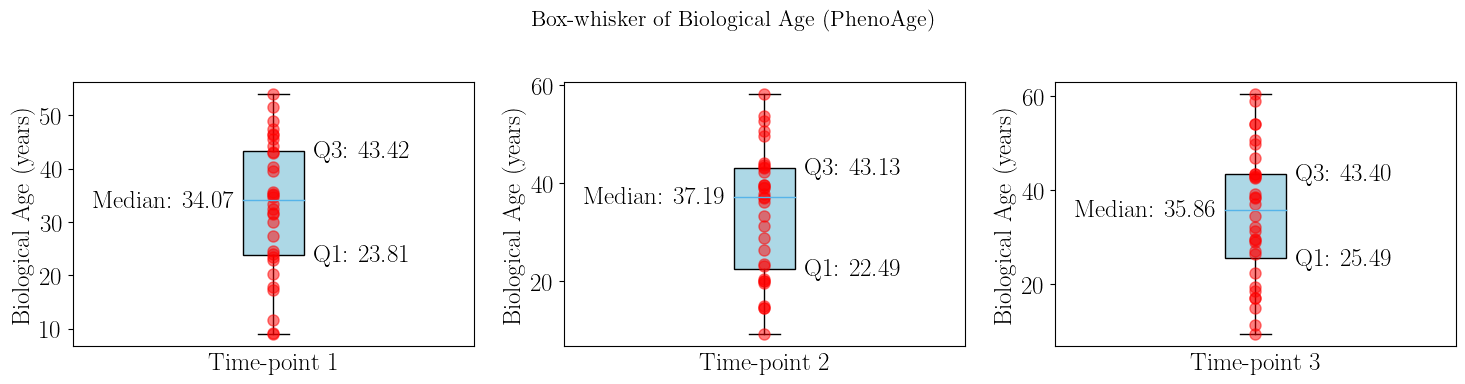

In [176]:
bio_age_stage_pheno = [merged_df[merged_df['Timepoint'] == i]['PhenoAge'] for i in range(1, 4)]
plot_box_whiskers_age_annotated(bio_age_stage_pheno, "Box-whisker of Biological Age (PhenoAge)", xlabel="Time-point", color = "red", alpha=0.5)

In [75]:
[np.median(bio_age_stage_pheno[i]) for i in range(0, 3)], [np.mean(bio_age_stage_pheno[i]) for i in range(0, 3)]

([34.07310528638165, 37.190273284655305, 35.86229811264113],
 [33.05606868583697, 33.99226075734215, 34.79177875844866])

In [274]:
pheno_sites = get_top_markers_by_coefficient(pd.read_csv("horvath_clock.csv"), 10).iloc[0:, 0].values

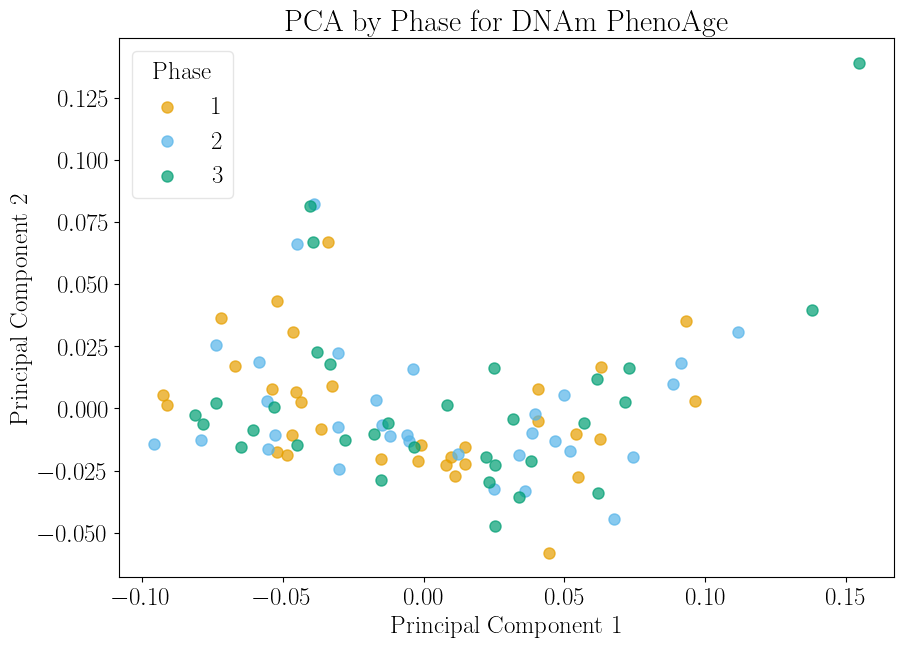

In [275]:
plot_pca_by_phase(pheno_sites, merged_df, "DNAm PhenoAge")

## DunedinPace (ElasticNet Coefficients)

In [8]:
dunedin_clock = compute_clock("dunedin", merged_df)
merged_df['DunedIn'] = dunedin_clock

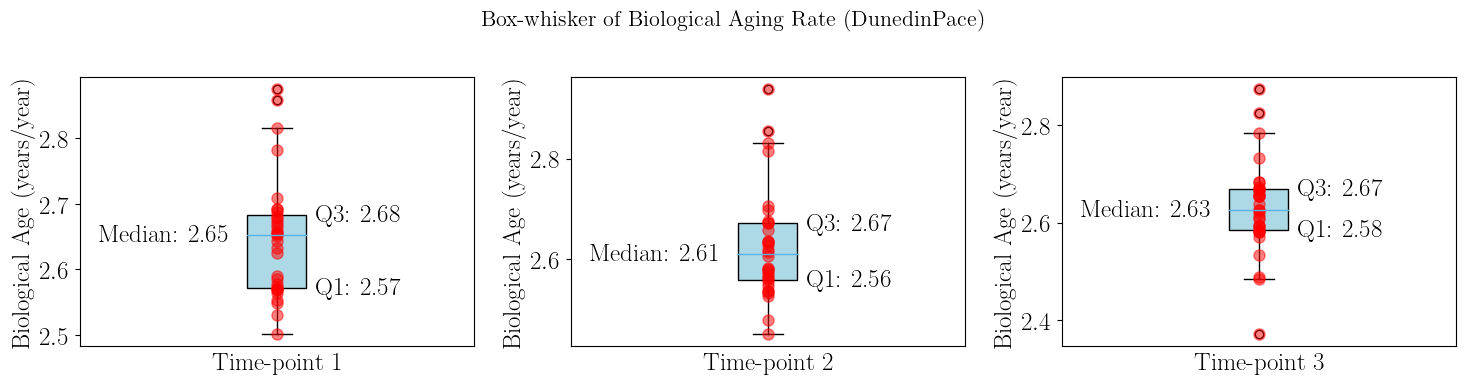

In [14]:
bio_age_stage_dune = [merged_df[merged_df['Timepoint'] == i]['DunedIn'] for i in range(1, 4)]
plot_box_whiskers_age_annotated(bio_age_stage_dune, "Box-whisker of Biological Aging Rate (DunedinPace)", xlabel="Time-point", color = "red", alpha=0.5)

In [21]:
[np.mean(bio_age_stage_dune[i]) for i in range(0, 3)]

[2.6480259430549737, 2.6269214686062714, 2.630485295465219]

In [247]:
buchinger = [el for el in merged_df.columns.to_list() if "ch" in el or "cg" in el]
kaggle_cpgs = pd.read_csv("cpg_column.csv")
overlapping_cpgs = np.intersect1d(kaggle_cpgs, buchinger)

In [251]:
overlapping_cpgs

array(['cg00000029', 'cg00000109', 'cg00000165', ..., 'ch.X.97651759F',
       'ch.X.97737721F', 'ch.X.98007042R'], dtype=object)

In [252]:
len(overlapping_cpgs), len(buchinger), len(kaggle_cpgs)

(452832, 866238, 485512)

In [253]:
# Save the overlapping CpG to disk 
np.save("common_cpg.npy", overlapping_cpgs)

## After running kaggle_training.ipynb and cfffprize_buchinger.ipynb

In [23]:
ages_buch = pd.read_csv("buch_custom_clock.csv")
ages_buch_list = ages_buch.columns.values.astype(float)

In [24]:
ages_s1 = [ages_buch_list[3*i] for i in range(32)]
ages_s2 = [ages_buch_list[3*i+1] for i in range(32)]
ages_s3 = [ages_buch_list[3*i+2] for i in range(32)]

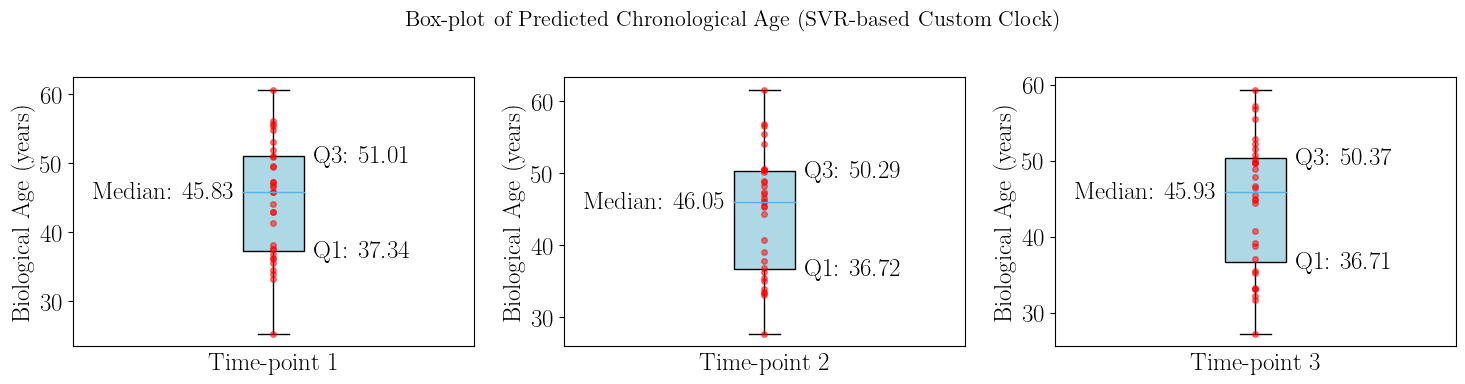

In [169]:
plot_box_whiskers_age_annotated([ages_s1, ages_s2, ages_s3], "Box-plot of Predicted Chronological Age (SVR-based Custom Clock)" , xlabel="Time-point", color="red", alpha=0.5)

In [63]:
np.mean(ages_s1), np.mean(ages_s2), np.mean(ages_s3)

(44.516684359377535, 44.475966082696786, 44.451019270177795)

In [73]:
t_stat, p_value = ttest_rel(ages_s2, ages_s3)
t_stat, p_value

(0.09254495451644447, 0.9268605739586102)

In [74]:
t_stat, p_value = ttest_rel(ages_s1, ages_s3)
t_stat, p_value

(0.15833909702059734, 0.8752165811728985)

In [75]:
t_stat, p_value = ttest_rel(ages_s1, ages_s2)
t_stat, p_value

(0.11294799994825488, 0.9108000513488529)

In [117]:
t_stat, p_value = ttest_rel(bio_age_stage_dune[0], bio_age_stage_dune[1])
t_stat, p_value

(2.2736875373211793, 0.030062097688636512)

In [118]:
t_stat, p_value = ttest_rel(bio_age_stage_dune[0], bio_age_stage_dune[2])
t_stat, p_value

(2.0711178168796955, 0.046760032012756345)

In [119]:
t_stat, p_value = ttest_rel(bio_age_stage_dune[1], bio_age_stage_dune[2])
t_stat, p_value

(-0.3301029742433642, 0.7435426448945512)

In [132]:
## How many ages decreased?
np.sum(bio_age_stage_hor[2].values < bio_age_stage_hor[0].values), np.sum(bio_age_stage_hor[2].values > bio_age_stage_hor[0].values), np.sum(bio_age_stage_hor[2].values == bio_age_stage_hor[0].values)

(13, 18, 1)

In [133]:
np.sum(bio_age_stage_pheno[2].values < bio_age_stage_pheno[0].values), np.sum(bio_age_stage_pheno[2].values > bio_age_stage_pheno[0].values), np.sum(bio_age_stage_pheno[2].values == bio_age_stage_pheno[0].values)

(11, 21, 0)

In [134]:
np.sum(bio_age_stage_dune[2].values < bio_age_stage_dune[0].values), np.sum(bio_age_stage_dune[2].values > bio_age_stage_dune[0].values), np.sum(bio_age_stage_dune[2].values == bio_age_stage_dune[0].values)

(21, 11, 0)

In [124]:
bio_age_stage_hor[0].values

array([43.3, 54.3, 33.5, 43.1, 49.2, 64.3, 25.3, 31. , 24.5, 43.3, 31. ,
       49.5, 50.8, 56.2, 30.6, 49. , 48.7, 55.5, 54.6, 58.9, 51. , 30.8,
       32.8, 26.6, 25.4, 40.2, 44.8, 50.4, 54.8, 43.3, 43.8, 27.1])

In [138]:
df_aging

,ID.Patient,ID_Primary_sample,Samples,Nb.sites,Timepoint,Sex.prediction,Ethnicity.prediction,Sex,Score.horvath,Score GKM age,Value.Smoking.position.population,Value.Equivalent.cigarettes,Value.Diet.position.population,Value.Equivalent.fruits.vegis,Value.Alcohol.position.population,Value.Equivalent.alcohol.units,Value.Activity.position.population,Value.Equivalent.minutes.of.activity
0,B__001,VB_0000000592,4033965402,866238,1,Correct,WHITE,Male,43.3,52.640,24,0,41,4.0,53,4,77,540
1,B__001,VB_0000000593,4033964727,866238,2,Correct,WHITE,Male,44.0,53.450,14,0,42,4.0,43,2,39,120
2,B__001,VB_0000000594,4033964893,866238,3,Correct,WHITE,Male,46.5,51.700,21,0,41,4.0,35,1,74,540
3,B__002,VB_0000000618,4033965028,866238,1,Correct,WHITE,Male,54.3,56.900,24,0,50,4.0,34,1,3,60
4,B__002,VB_0000000619,4033965193,866238,2,Correct,WHITE,Male,55.4,64.100,20,0,10,2.0,58,6,25,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,B__032,VB_0000000741,4033963319,866238,2,Correct,WHITE,Male,41.2,46.470,7,0,35,3.5,29,0,30,90
92,B__032,VB_0000000742,4033963470,866238,3,Correct,WHITE,Male,42.4,44.099,10,0,41,4.0,36,1,25,90
93,B__033,VB_0000000743,4033963187,866238,1,Correct,WHITE,Male,27.1,35.300,0,0,41,4.0,35,1,24,90
94,B__033,VB_0000000744,4033963311,866238,2,Correct,WHITE,Male,33.9,33.400,9,0,50,4.0,42,2,26,90


In [141]:
lists_custom = [ages_s1, ages_s2, ages_s3]
ages_custom = [val for tup in zip(*lists_custom) for val in tup]
lists_dune = [bio_age_stage_dune[i] for i in range(3)]
ages_dune = [val for tup in zip(*lists_dune) for val in tup]
lists_phone = [bio_age_stage_pheno[i] for i in range(3)]
ages_pheno =  [val for tup in zip(*lists_phone) for val in tup]

In [152]:
df_aging['Dunedin'] = ages_dune
df_aging['PhenoAge'] = ages_pheno
df_aging['Custom'] = ages_custom
df_aging['Horvath'] =df_aging['Score.horvath']
df_aging['Cigarette'] = df_aging['Value.Equivalent.cigarettes']
df_aging['Fruits/veg'] = df_aging['Value.Equivalent.fruits.vegis']
df_aging['Alcohol'] = df_aging['Value.Equivalent.alcohol.units']
df_aging['Activity'] = df_aging['Value.Equivalent.minutes.of.activity']

In [153]:
allowed_cols_heatmap = ["Dunedin", "PhenoAge", "Custom", "Horvath", 'Cigarette', 'Fruits/veg', 'Alcohol', 'Activity'] #+ [el for el in df_aging.columns.values if "Equi" in el]
allowed_cols_heatmap

['Dunedin',
 'PhenoAge',
 'Custom',
 'Horvath',
 'Cigarette',
 'Fruits/veg',
 'Alcohol',
 'Activity']

In [154]:
df=df_aging[allowed_cols_heatmap]

C:\Users\amroa\AppData\Local\Temp\ipykernel_3880\2002758921.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


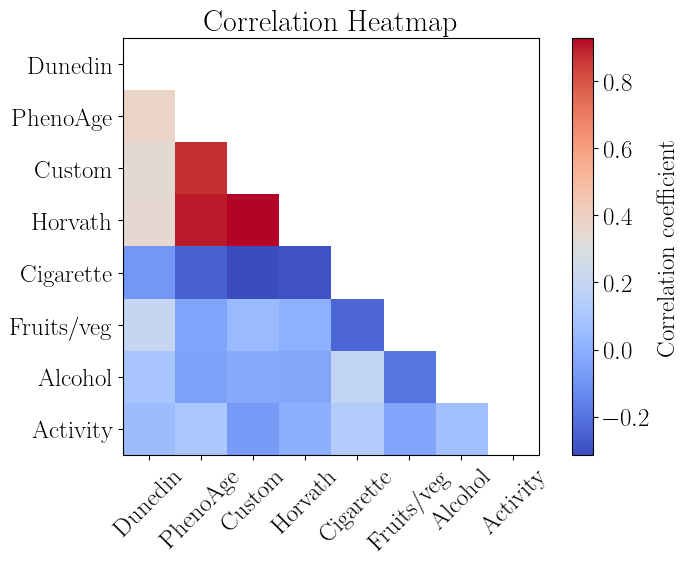

In [158]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
masked_corr = np.ma.masked_where(mask, corr)

plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.imshow(masked_corr, cmap='coolwarm', interpolation='none')

# Add colorbar and labels
plt.colorbar(label='Correlation coefficient')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.index)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("corr_img.png")
plt.show()


In [3]:
probes = [el for el in merged_df.columns.values if el.startswith("cg") or el.startswith("ch")]
betas = merged_df[probes].iloc[0, :].values #  for first person

In [4]:
df_sample = pd.DataFrame({
    'probes': probes,
    'beta': betas
})

In [5]:
df_sample

,probes,beta
0,cg07881041,0.915499
1,cg23229610,0.876176
2,cg03513874,0.912605
3,cg05451842,0.115954
4,cg14797042,0.954318
...,...,...
866233,cg10218605,0.414216
866234,cg06899844,0.082461
866235,cg22494081,0.951737
866236,cg22623303,0.969829


In [242]:
df_sample['probes'] = df_sample['probes'].astype(str)
df_sample['beta'] = df_sample['beta'].astype('float64')

In [10]:
df_sample.to_csv("sample_values.csv", index=False) # For the HF space testing